In [22]:
import librosa
import librosa.display
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [23]:
data_path = Path("./data", "genres")
pop = Path(data_path, "pop", "pop.00002.wav")

# pressure strengths (y) and sample rate (sr)
y, sr = librosa.load(pop)

print('y:', y, '\n')

y: [-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] 



Clean audio data

In [24]:
# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')

Audio File: [-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] 



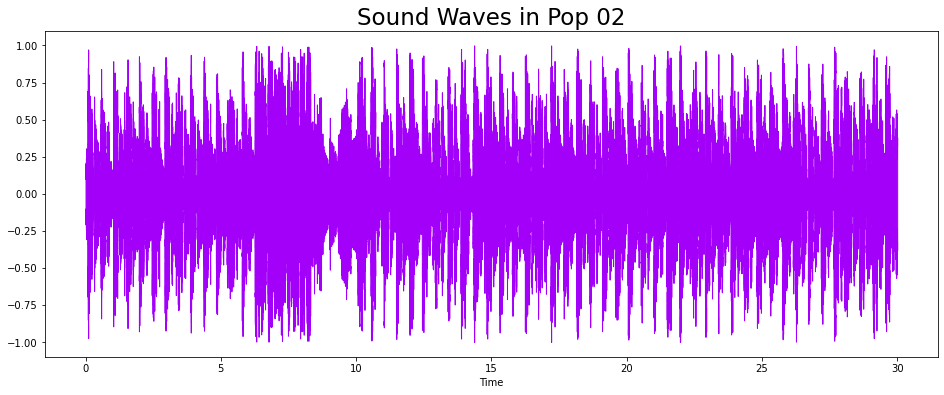

In [25]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Sound Waves in Pop 02", fontsize = 23);
plt.show()

Fourier transform

We will then perform a fourier transform to convert the y-axis (frequency) to log scale, and the “color” axis (amplitude) to Decibels.

In [26]:
# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1293)


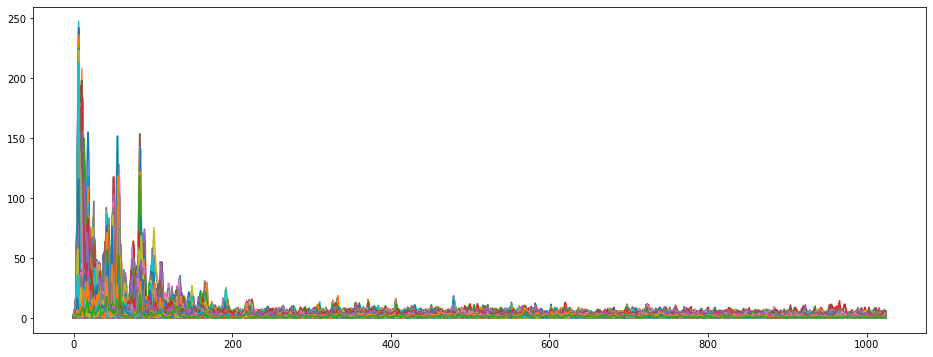

In [27]:
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.show()

## Audio features

Zero crossing rate

In [28]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(audio_file, pad=False)
print(np.mean(zero_crossings))

0.11907562161377709


Harmonics and Perceptuals


    Harmonics (the orange wave) are audio characteristics that human ears can’t distinguish (represents the sound color)

    Perceptual (the purple wave) are sound waves that represent rhythm and emotion of the music.


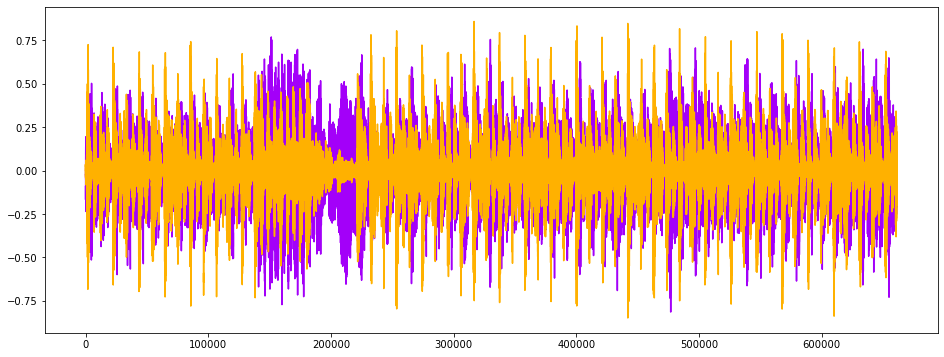

In [29]:
y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.show()

In [30]:
y_harm

array([-0.09336969, -0.12038878, -0.11286224, ...,  0.09144665,
        0.09490193,  0.05472403], dtype=float32)

Beats per minute

In [31]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

/tmp/ipykernel_22385/500543870.py:1: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  tempo, _ = librosa.beat.beat_track(y, sr = sr)


83.35433467741936

Spectral centroid

This variable represents brightness of a sound by calculating the center of sound spectrum (where the sound signal is at its peak). We can also plot it into a wave form.

In [32]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')

Centroids: [2951.76108677 2998.30633581 3043.45666379 ... 3476.4010229  3944.15380855
 3862.537183  ] 



/tmp/ipykernel_22385/3043919569.py:2: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(audio_file, sr=sr)[0]


In [33]:
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization

frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')

print('t:', t)

# Function that normalizes the Sound Data

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


In [34]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

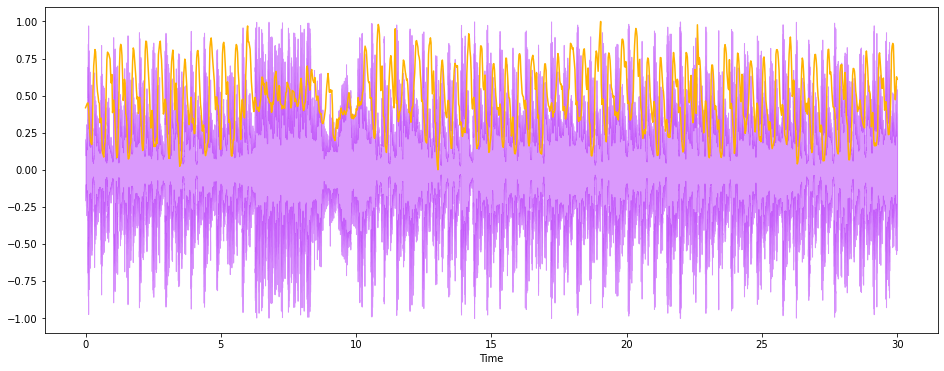

In [35]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');
plt.show()

Spectral Rolloff

Spectral Rolloff is a frequency below a specified percentage of the total spectral energy. It is like we have a cut-point, and we visualize the sound wave that is below that cut-point. Let’s just call it as another characteristic of a sound.


/tmp/ipykernel_22385/1329259726.py:2: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]


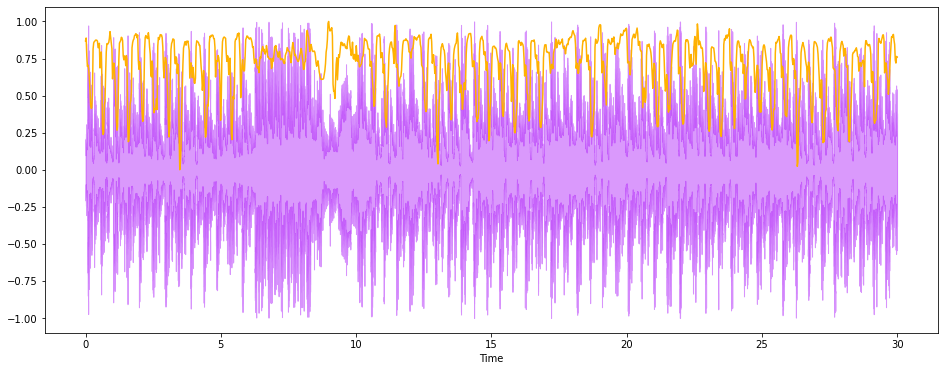

In [36]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(audio_file, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(audio_file, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');
plt.show()

Mel-Frequency Cepstral Coefficients

The Mel frequency Cepstral coefficients (MFCCs) of a signal are a small set of features that describes the overall shape of a spectral envelope. It imitates characteristics of human voice.


mfccs shape: (20, 1293)


/tmp/ipykernel_21658/1340695573.py:1: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(audio_file, sr=sr)


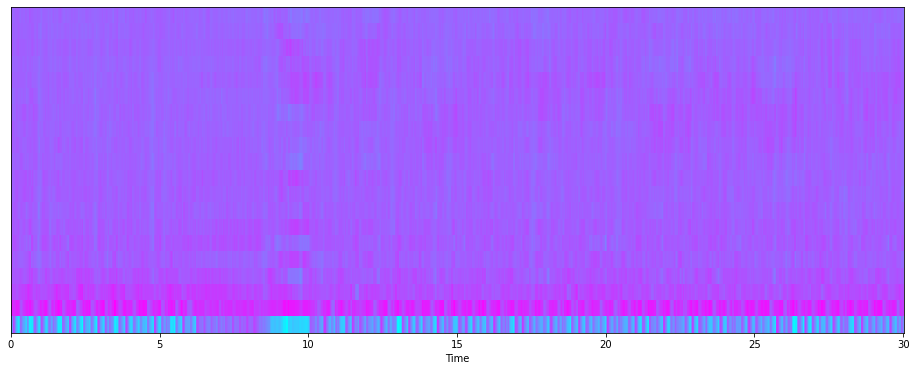

In [35]:
mfccs = librosa.feature.mfcc(audio_file, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
plt.show()

/home/ivo/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:194: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/ivo/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


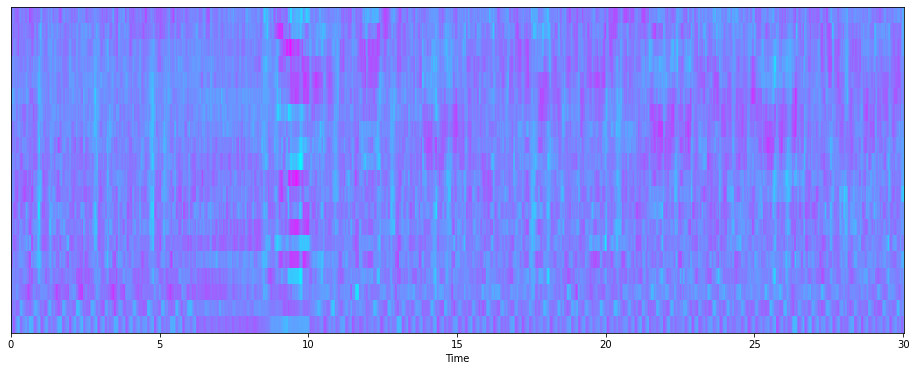

In [36]:
# We can scale the data a bit to make the feature (blue part) more apparent.

# Perform Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
plt.show()

Chroma Frequencies

Chroma feature represents the tone of music or sound by projecting its sound spectrum into a space that represents musical octave. This feature is usually used in chord recognition task.


In [37]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

Chromogram shape: (12, 133)


/tmp/ipykernel_21658/2662639543.py:5: FutureWarning: Pass y=[-0.09274292 -0.11630249 -0.11886597 ...  0.14419556  0.16311646
  0.09634399] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chromagram = librosa.feature.chroma_stft(audio_file, sr=sr, hop_length=hop_length)


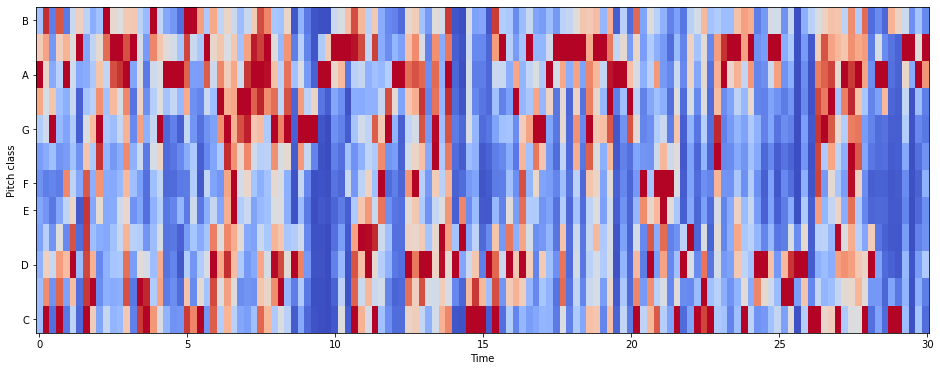

In [38]:
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');
plt.show()

## Exploratory data analysis

In [39]:
data = pd.read_csv('features_30_sec.csv')
data.head()

NameError: name 'pd' is not defined